In [168]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read CSV (replace 'your_file.csv' with the actual filename)
df = pd.read_csv(r"diabetes - diabetes.csv")

# Show first rows
df.head()

Saving diabetes - diabetes.csv to diabetes - diabetes (4).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [169]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [171]:
df.duplicated().sum()

np.int64(0)

In [172]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [173]:
df['Outcome'].value_counts(normalize=True)

,proportion
Outcome,
0,0.651042
1,0.348958


In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency, pointbiserialr

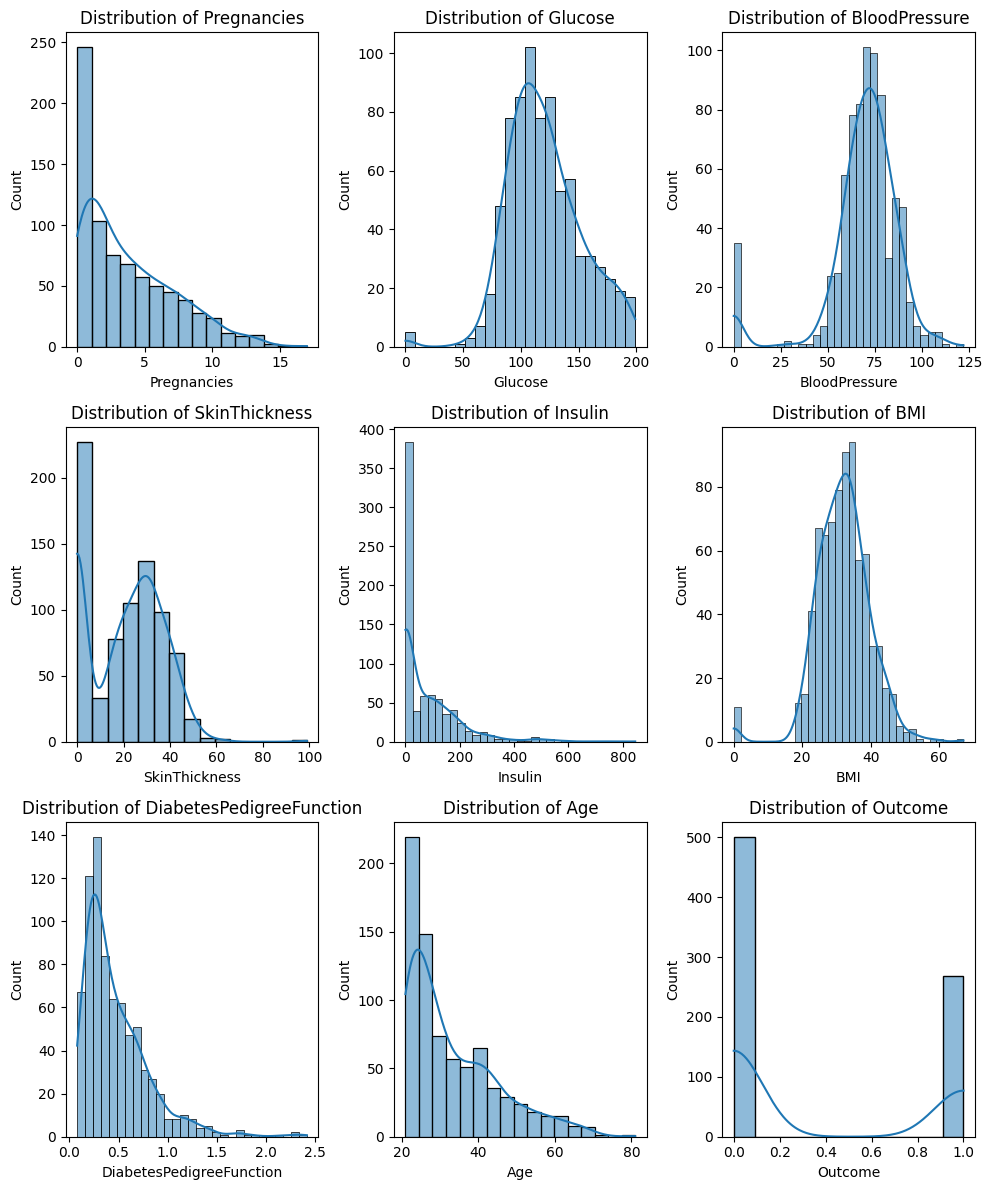

In [175]:
# Automatically create grid size

fig, axes = plt.subplots(3, 3, figsize=(10, 4*3))
axes = axes.flatten()  # flatten to 1D array

for i, col in enumerate(num_cols):
    sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



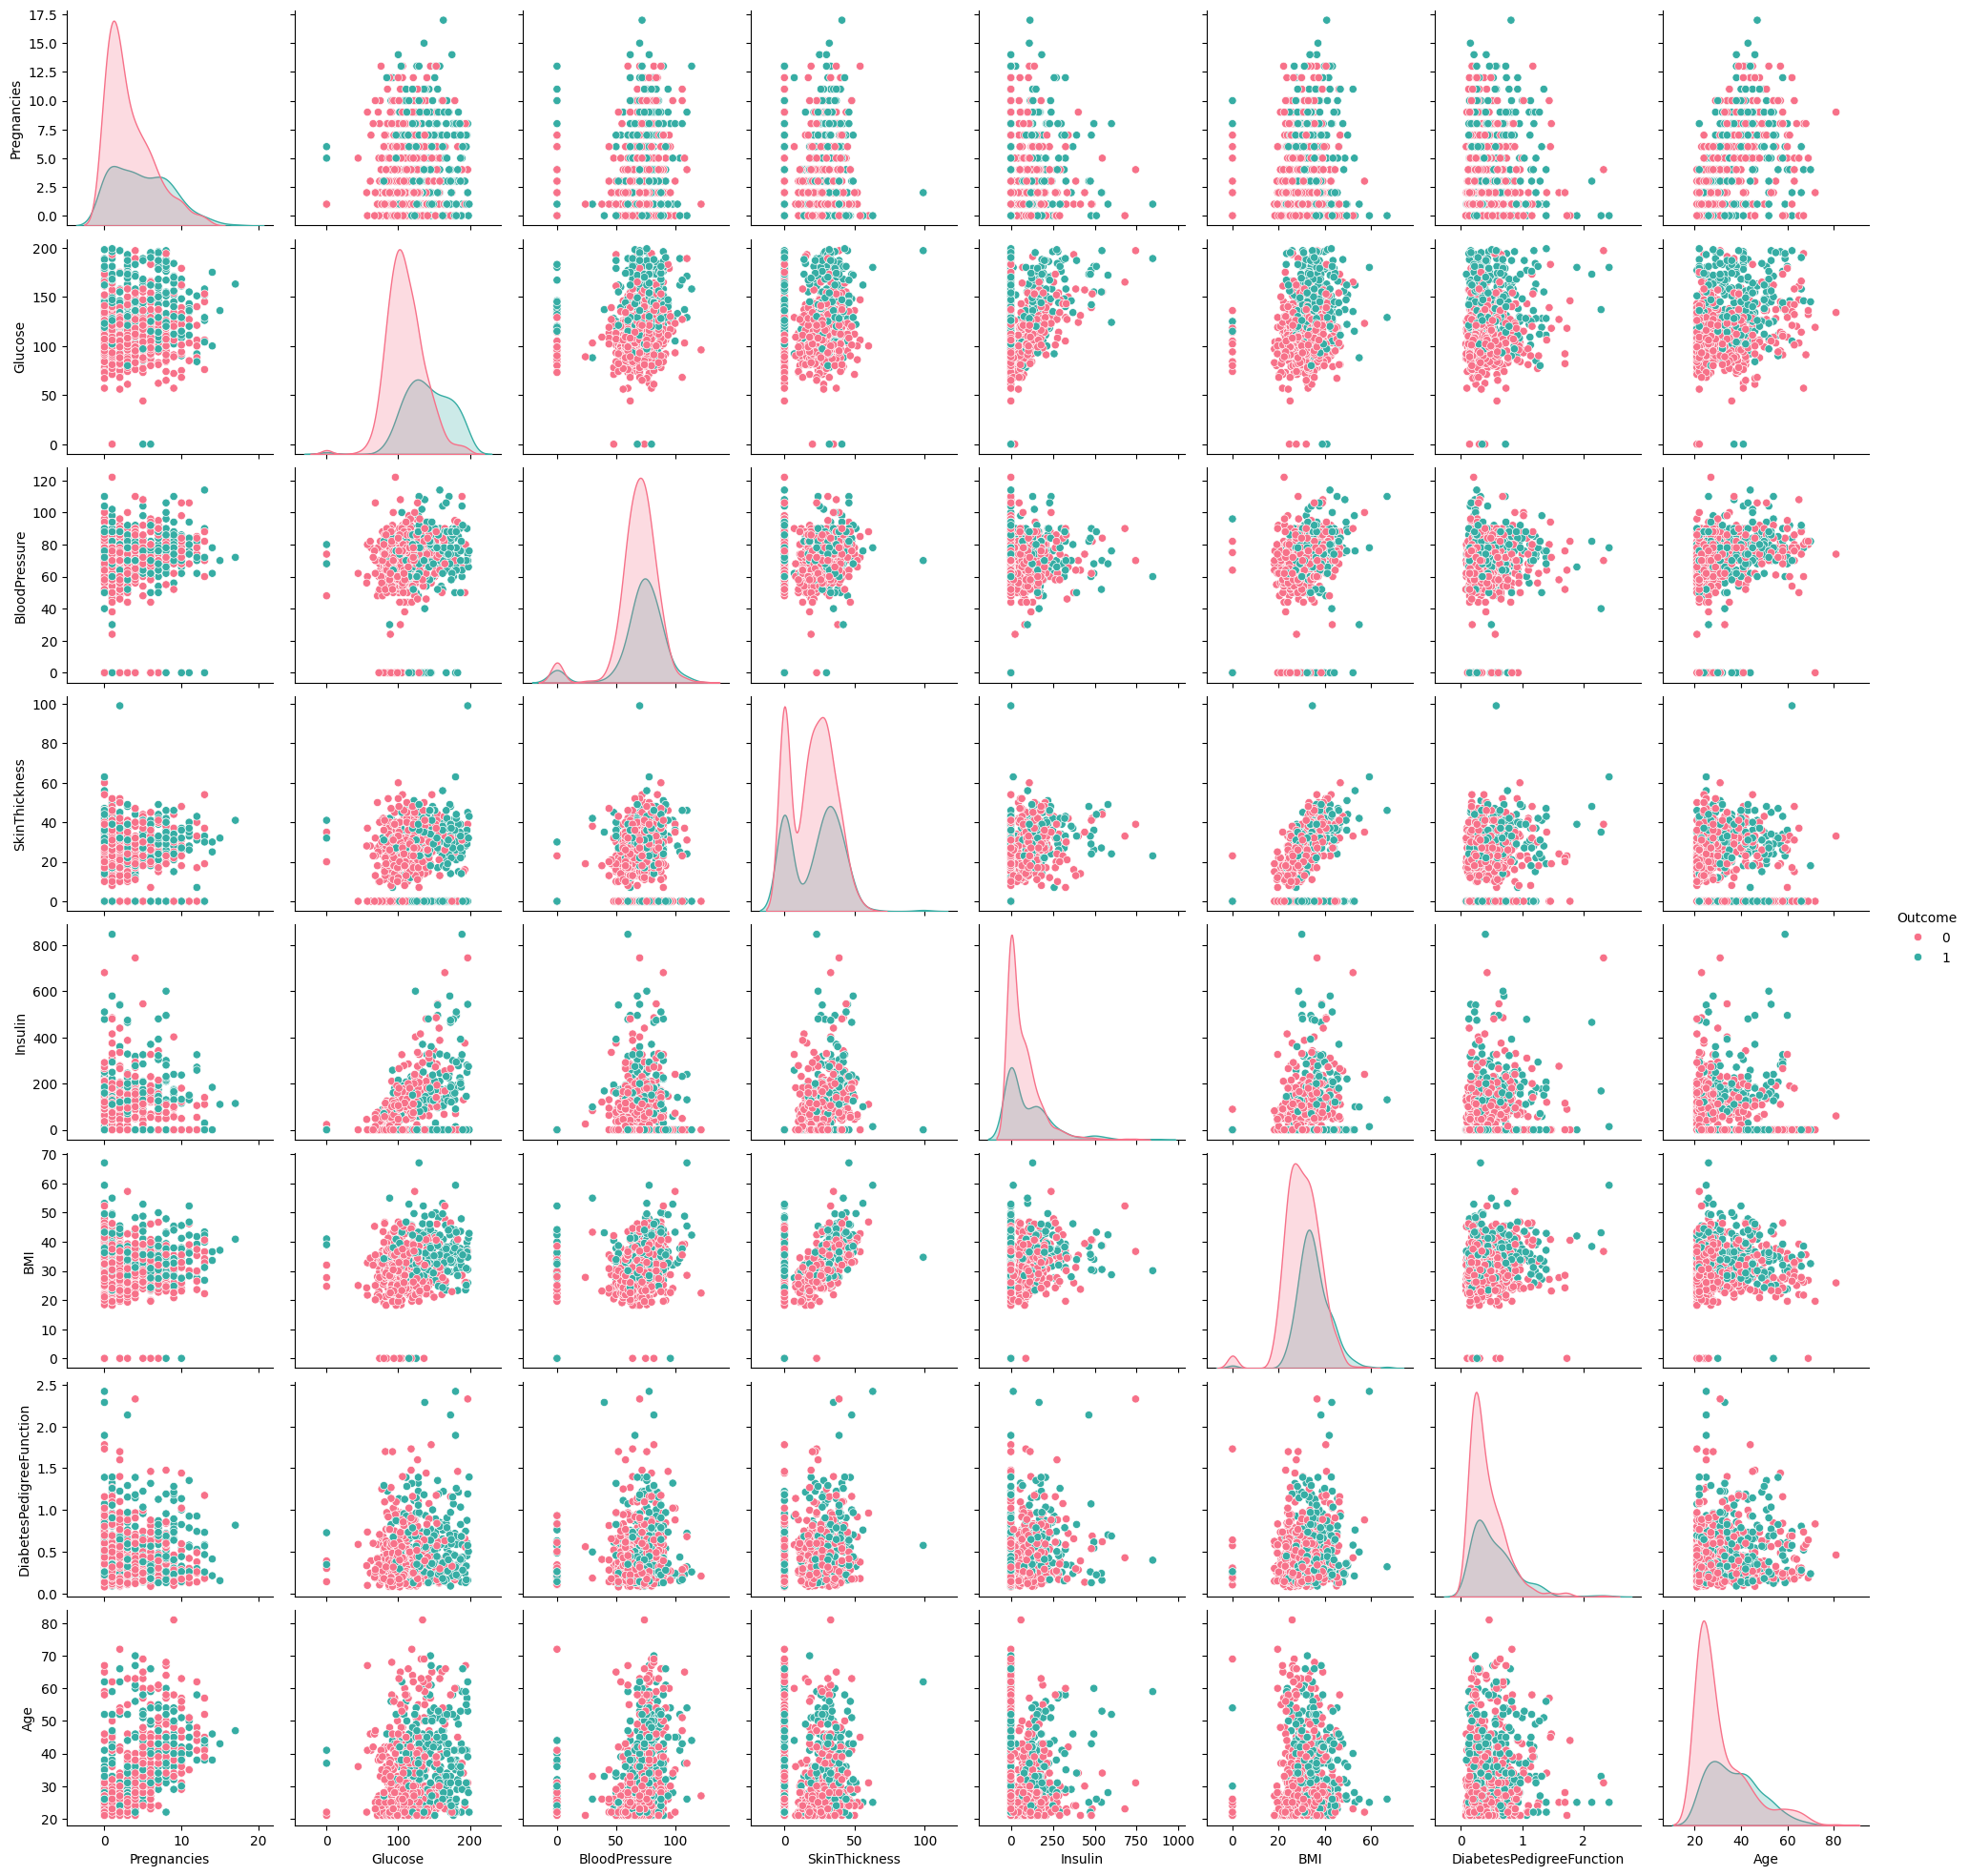

In [176]:
sns.pairplot(df,
             hue='Outcome',
             diag_kind="kde",
             palette="husl")
plt.show()

/tmp/ipython-input-1116073223.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set1", ax=axes[plot_idx])
/tmp/ipython-input-1116073223.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set1", ax=axes[plot_idx])
/tmp/ipython-input-1116073223.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=col, data=df, palette="Set1", ax=axes[plot_idx])
/tmp/ipython-input-1116073223.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecat

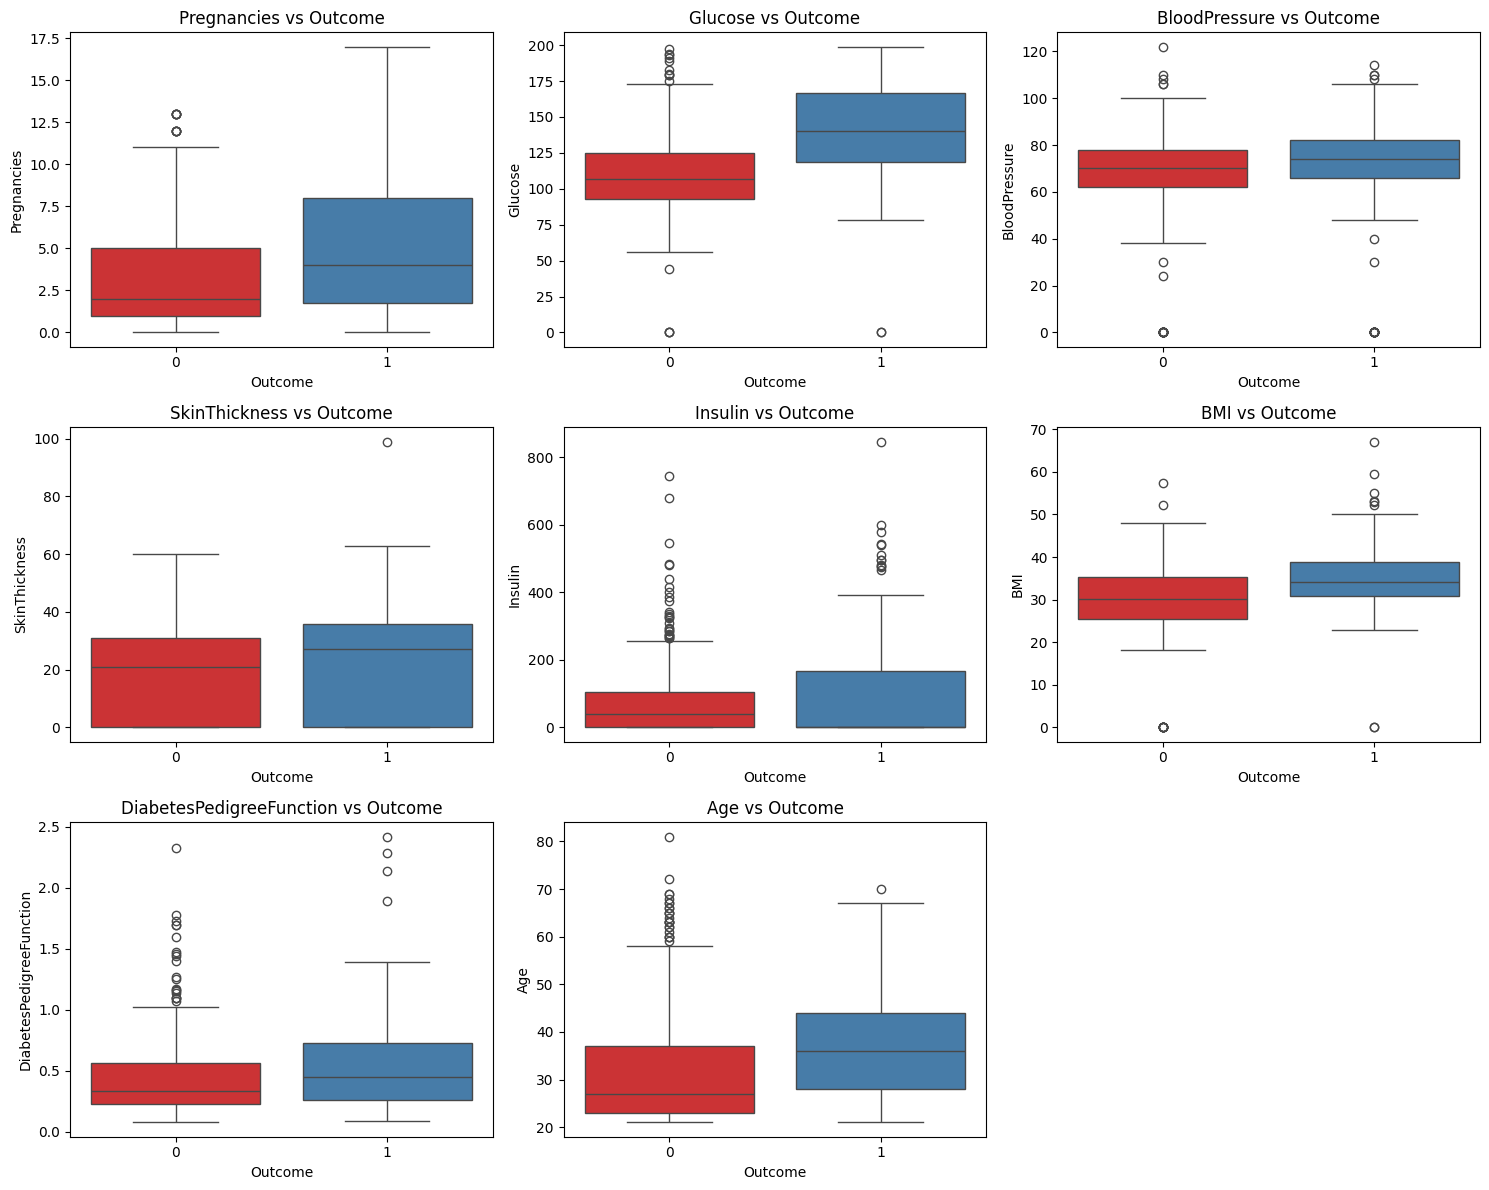

In [177]:
target_col = 'Outcome'
fig, axes = plt.subplots(3, 3, figsize=(15, 4*3))
axes = axes.flatten()

plot_idx = 0
for col in num_cols:
    if col != target_col:  # skip the target itself
        sns.boxplot(x=target_col, y=col, data=df, palette="Set1", ax=axes[plot_idx])
        axes[plot_idx].set_title(f"{col} vs {target_col}")
        plot_idx += 1

# Remove extra unused axes
for j in range(plot_idx, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


/tmp/ipython-input-1293034490.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette="Set2")


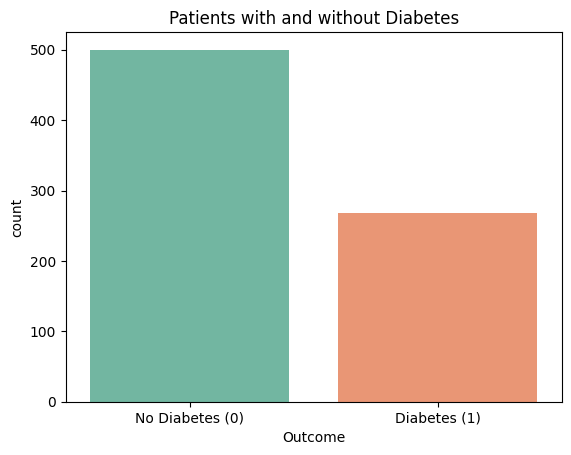

In [178]:
# Count of patients by Outcome
df['Outcome'].value_counts()

# Percentage
df['Outcome'].value_counts(normalize=True) * 100

# Plot
sns.countplot(x='Outcome', data=df, palette="Set2")
plt.title("Patients with and without Diabetes")
plt.xticks([0, 1], ['No Diabetes (0)', 'Diabetes (1)'])
plt.show()


/tmp/ipython-input-3703728962.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_bin_outcome = df.groupby(['Glucose_bin', 'Outcome']).size().reset_index(name='count')


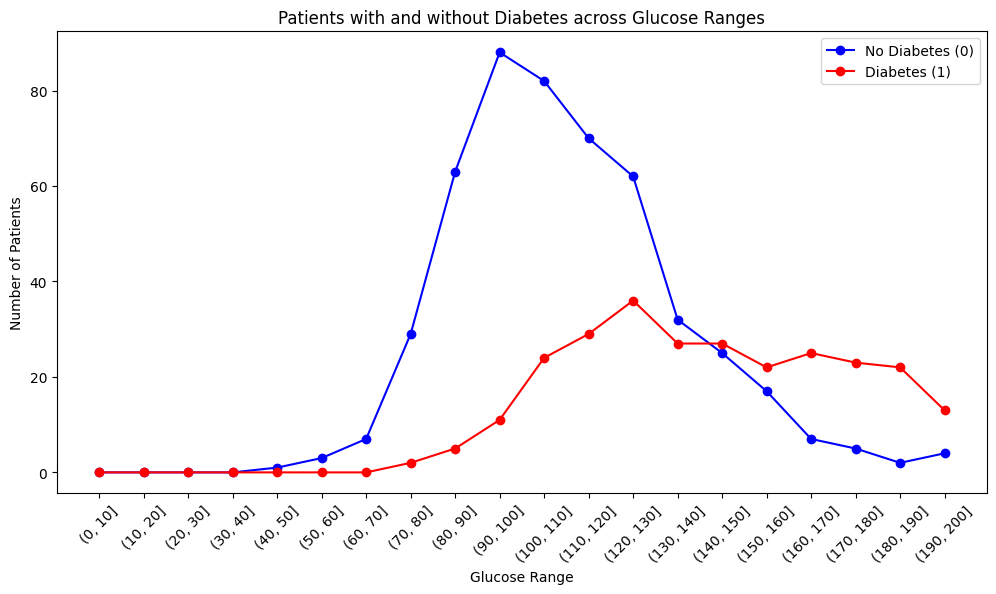

In [179]:
# Create glucose bins of size 10
df['Glucose_bin'] = pd.cut(df['Glucose'], bins=range(0, int(df['Glucose'].max())+10, 10))

# Group by bins and outcome
glucose_bin_outcome = df.groupby(['Glucose_bin', 'Outcome']).size().reset_index(name='count')

# Pivot so Outcome 0 and 1 become columns
glucose_bin_pivot = glucose_bin_outcome.pivot(index='Glucose_bin', columns='Outcome', values='count').fillna(0)

# Line plot
plt.figure(figsize=(12,6))
plt.plot(glucose_bin_pivot.index.astype(str), glucose_bin_pivot[0], label="No Diabetes (0)", color="blue", marker="o")
plt.plot(glucose_bin_pivot.index.astype(str), glucose_bin_pivot[1], label="Diabetes (1)", color="red", marker="o")

plt.xlabel("Glucose Range")
plt.ylabel("Number of Patients")
plt.title("Patients with and without Diabetes across Glucose Ranges")
plt.xticks(rotation=45)
plt.legend()
plt.show()


<Figure size 800x500 with 0 Axes>

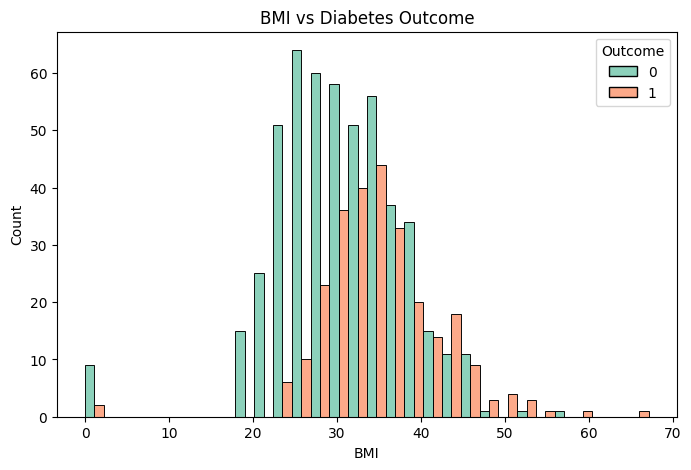

In [180]:
plt.figure(figsize=(8,5))

# histograms
plt.figure(figsize=(8,5))
sns.histplot(df, x="BMI", hue="Outcome", bins=30, kde=False, palette="Set2", multiple="dodge")
plt.title("BMI vs Diabetes Outcome")
plt.show()


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and Target (y)
X =X = df.drop(columns=['Outcome', 'Glucose_bin'])
y = df['Outcome']

# Split into Train/Test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [191]:
scaler = StandardScaler()
# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight="balanced"
)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred = rf.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.7727272727272727



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



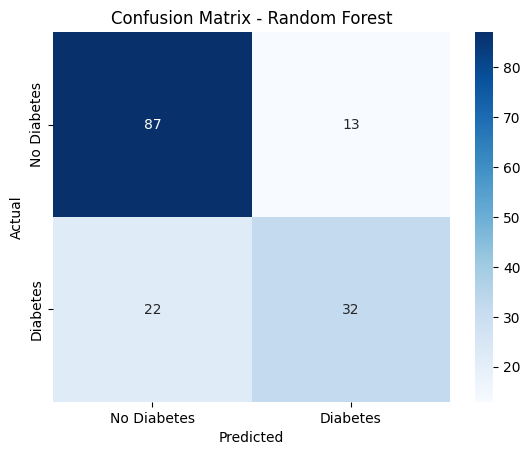

In [193]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()



In [194]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train SVM with RBF kernel (default)
svm = SVC(kernel="rbf", probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.7532467532467533



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



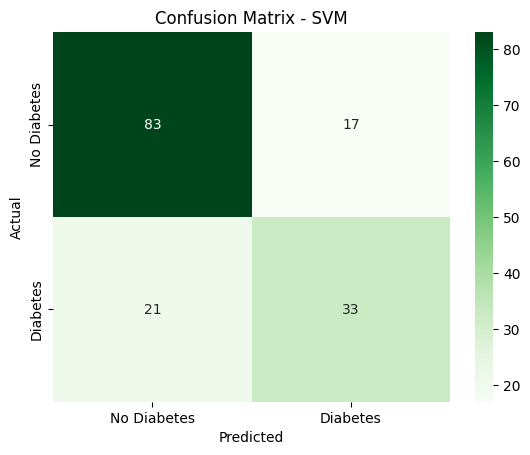

In [195]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

In [196]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=200,       # number of boosting rounds
    learning_rate=0.05,     # shrinkage rate
    max_depth=4,            # depth of each tree
    subsample=0.8,          # row sampling
    colsample_bytree=0.8,   # feature sampling
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb.predict(X_test_scaled)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 0.7467532467532467


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:28:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



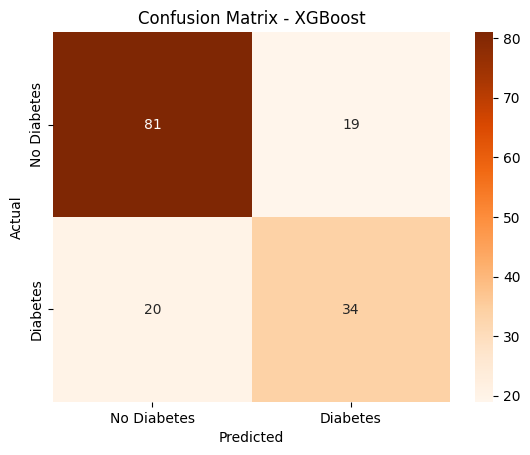

In [197]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=["No Diabetes", "Diabetes"],
            yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


In [198]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# 1. Random Forest Grid Search

rf_params = {
    "n_estimators": [100, 200,500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
}
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_grid = GridSearchCV(rf, rf_params, cv=skf, scoring="accuracy", n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

print("Best RF Params:", rf_grid.best_params_)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


# 2. SVM Grid Search

svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "gamma": ["scale", "auto"]
}
svm = SVC(probability=True, random_state=42)
svm_grid = GridSearchCV(svm, svm_params, cv=skf, scoring="accuracy", n_jobs=-1, verbose=1)
svm_grid.fit(X_train_scaled, y_train)

print("Best SVM Params:", svm_grid.best_params_)
svm_best = svm_grid.best_estimator_
svm_pred = svm_best.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

# 3. XGBoost Grid Search

xgb_params = {
    "n_estimators": [100, 200,500],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1],
}
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_grid = GridSearchCV(xgb, xgb_params, cv=skf, scoring="accuracy", n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_scaled, y_train)

print("Best XGB Params:", xgb_grid.best_params_)
xgb_best = xgb_grid.best_estimator_
xgb_pred = xgb_best.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


# 4. Compare Models

results = pd.DataFrame({
    "Model": ["Random Forest", "SVM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, xgb_pred)
    ],
    "Best Params": [
        rf_grid.best_params_,
        svm_grid.best_params_,
        xgb_grid.best_params_
    ]
})

print("\nModel Comparison:\n", results)



Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best RF Params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       100
           1       0.66      0.78      0.71        54

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best SVM Params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
SVM Accuracy: 0.7207792207792207
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

Fitti

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [00:30:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [201]:
import pandas as pd
import numpy as np

def predict_patient(input_data, model, features):
    # Convert dict → DataFrame with correct order
    row = pd.DataFrame([input_data])[features]

    # Get prediction
    pred = model.predict(row)[0]

    # Try to get probability
    prob = None
    if hasattr(model, "predict_proba"):
        prob = float(model.predict_proba(row)[0][1])

    return {
        "prediction": int(pred),
        "label": "Diabetic" if pred == 1 else "Non-Diabetic",
        "probability_positive": prob
    }


example_patient = {
    "Pregnancies": 2,
    "Glucose": 130,
    "BloodPressure": 70,
    "SkinThickness": 20,
    "Insulin": 79,
    "BMI": 28.5,
    "DiabetesPedigreeFunction": 0.5,
    "Age": 35
}


result = predict_patient(example_patient, model=rf_best , features=X.columns.tolist())
print(result)


{'prediction': 1, 'label': 'Diabetic', 'probability_positive': 0.6482600433824227}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
